In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/horses-reorganized/THIEL_619.jpg
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_103.png
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_042.png
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_018.png
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_097.png
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_049.png
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_027.png
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_107.png
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_056.png
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_040.png
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_060.png
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_086.png
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_033.png
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_114.png
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_029.png
/kaggle/input/horses-reorganized/archive/Akhal-Teke/01_028.png
/kaggle/

In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [3]:
path="/kaggle/input/horse-breeds"

In [4]:
def get_label(x):
    if "01_" in x:
        return "Akhal-Teke"
    elif "02_" in x:
        return "Appaloosa"
    elif "03_" in x:
        return "Orlov Trotter"
    elif "04_" in x:
        return "Vladimir Heavy Draft"
    elif "05_" in x:
        return "Percheron"
    elif "06_" in x:
        return "Arabian"
    else:
        return "Friesian"

In [5]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=get_label,
    item_tfms=Resize(224), batch_tfms=aug_transforms(mult=1))

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.778342,0.966829,0.291045,00:06


epoch,train_loss,valid_loss,error_rate,time
0,1.253799,0.611896,0.186567,00:04
1,0.941272,0.548555,0.149254,00:04
2,0.750257,0.515113,0.141791,00:03


In [7]:
learn.export('model.pkl')

In [8]:
cleaner = ImageClassifierCleaner(learn)
cleaner

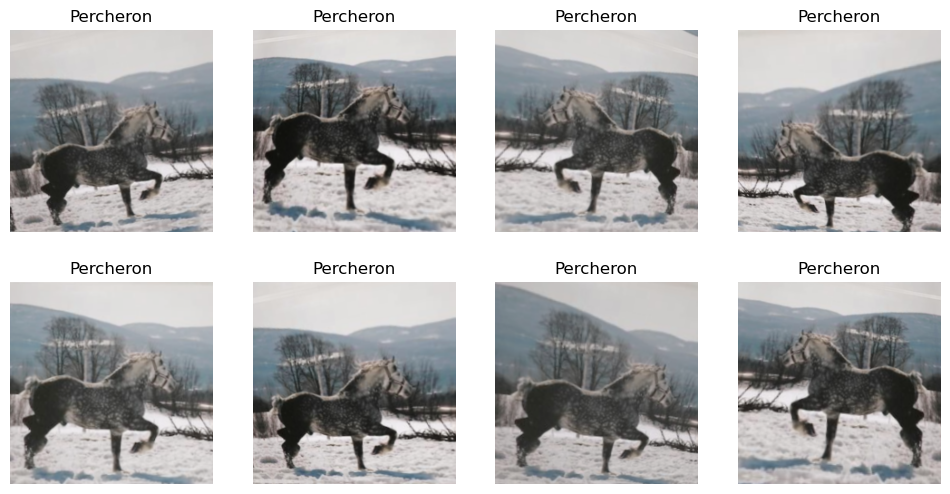

In [9]:
dls.train.show_batch(max_n=8, nrows=2, unique=True)

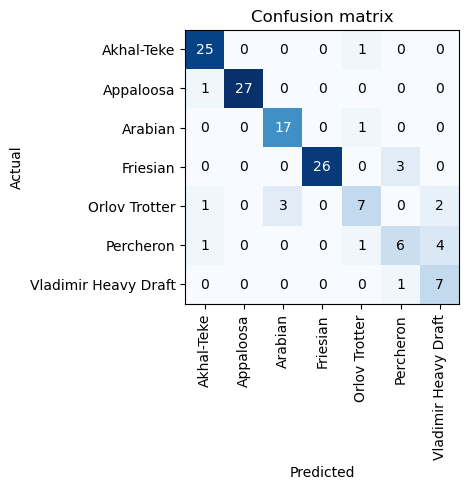

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

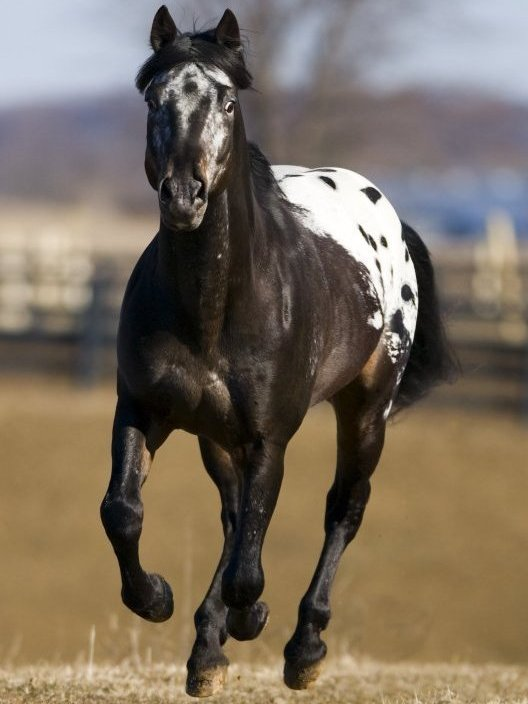

In [11]:
learn.predict('/kaggle/input/horses-reorganized/THIEL_619.jpg')

('Appaloosa',
 TensorBase(1),
 TensorBase([0.0046, 0.9126, 0.0126, 0.0063, 0.0329, 0.0128, 0.0182]))

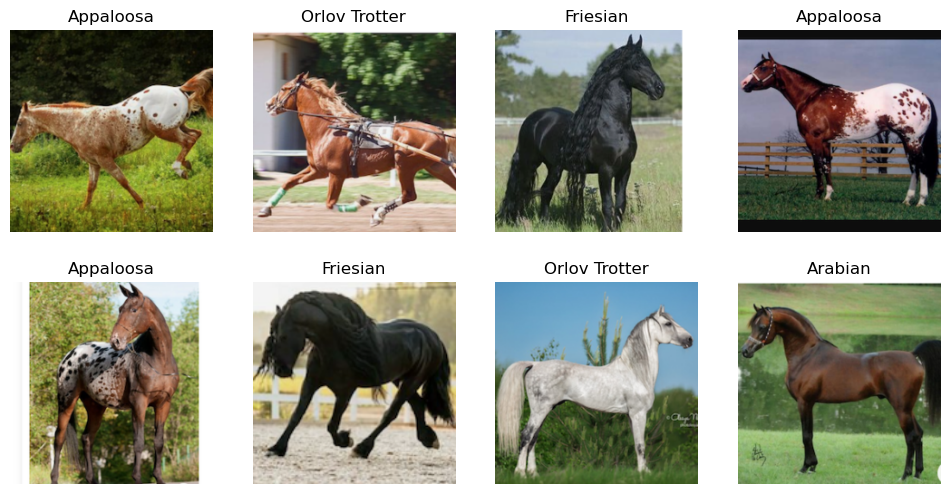

In [12]:
dls.valid.show_batch(max_n=8, nrows=2)